Import python libraries required for the script

In [1]:
from matplotlib import pyplot
from rfpimp import *
from sklearn.calibration import CalibratedClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
abc = AdaBoostClassifier()
bag = BaggingClassifier()
bgm = BayesianGaussianMixture
# bgpClfL = _BinaryGaussianProcessClassifierLaplace()
bnb = BernoulliNB()
cc = CalibratedClassifierCV()
cnb = ComplementNB()
# cp = _ConstantPredictor()
dtc = DecisionTreeClassifier()
etc1 = ExtraTreeClassifier()
etc2 = ExtraTreesClassifier(n_estimators=500)
gbc = GradientBoostingClassifier()
gm = GaussianMixture()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
knc = KNeighborsClassifier(n_neighbors=5)
ld = LinearDiscriminantAnalysis()
lp = LabelPropagation()
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
lrcv = LogisticRegressionCV()
ls = LabelSpreading()
lsvc = LinearSVC(max_iter=2000, tol=0.001)
mnnb = MultinomialNB()
mlp1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64, 32, 16, 8, 4, 2), random_state=1, warm_start=True)
nsvc = NuSVC(gamma='scale') # need to study about good value for nu
qda = QuadraticDiscriminantAnalysis()
rfc = RandomForestClassifier(n_estimators=500, warm_start=True)
sgd = SGDClassifier(max_iter=1000, tol=0.001)
svc = SVC(gamma='scale')
# voteClf = VotingClassifier()
xgb = XGBClassifier(max_depth=4, n_estimators=500) # max_depth=5, 

Read the CSV files

In [3]:
df = pd.read_csv('VMI_Data_BP2_V02_AK6_mod02.csv')
print(df.columns)

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_OK', 'BP2_S8_L',
       'BP2_S7_L', 'BP2_S6_L', 'BP2_S5_L', 'BP2_S4_L', 'BP2_S3_L', 'BP2_S2_L',
       'BP2_S1_ML', 'BP2_S1_MR', 'BP2_S2_R', 'BP2_S3_R', 'BP2_S4_R',
       'BP2_S5_R', 'BP2_S6_R', 'BP2_S7_R', 'BP2_S8_R', 'PART_LENGTH',
       'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
       'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
       'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
       'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV',
       'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
       'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
       'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA',
       'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10',
       'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5',
       'RHT_SPLICE_SLOPE10', 'RHT_SPLICE_SLOPE20

In [4]:
df = df.drop(['LFT_SPLICE_LENGTH', 'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_OK', 'LFT_SPLICE_GRADE', 
              'MID_SPLICE_GRADE', 'RHT_SPLICE_GRADE', 'LFT_SPLICE_DELTA', 'MID_SPLICE_DELTA', 'RHT_SPLICE_DELTA',
              'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 
              'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50', 
              'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
              'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20',
              'MID_SPLICE_SLOPE50',  'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10', 
              'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10',
              'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50'
             ], axis=1)

print(df.columns)

# for col in df.columns:
#     if len(df[col].unique()) == 1:
#         df = df.drop(col,inplace=True,axis=1)
        
# print(df.columns)
# df['SPLICE_GRADE'].head

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'BP2_S8_L', 'BP2_S7_L', 'BP2_S6_L',
       'BP2_S5_L', 'BP2_S4_L', 'BP2_S3_L', 'BP2_S2_L', 'BP2_S1_ML',
       'BP2_S1_MR', 'BP2_S2_R', 'BP2_S3_R', 'BP2_S4_R', 'BP2_S5_R', 'BP2_S6_R',
       'BP2_S7_R', 'BP2_S8_R', 'PART_LENGTH', 'LFT_SPLICE_PREV',
       'MID_SPLICE_PREV', 'RHT_SPLICE_PREV', 'SPLICE_GRADE'],
      dtype='object')


Check the columns in the data

In [5]:
print(df.shape)
# df = df.drop_duplicates(subset=['CUT_LENGTH', 'CONV_WAIT_TIME', 'BP2_S8_L', 'BP2_S7_L', 'BP2_S6_L', 'BP2_S5_L', 
#                                 'BP2_S4_L', 'BP2_S3_L', 'BP2_S2_L', 'BP2_S1_ML', 'BP2_S1_MR', 'BP2_S2_R', 
#                                 'BP2_S3_R', 'BP2_S4_R', 'BP2_S5_R', 'BP2_S6_R', 'BP2_S7_R', 'BP2_S8_R'])
df = df.drop_duplicates()
print(df.shape)
# df.head

(118739, 23)
(118739, 23)


In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(10))
df = df.dropna()

                Total  Percent
SPLICE_GRADE        0      0.0
BP2_S1_MR           0      0.0
CONV_WAIT_TIME      0      0.0
BP2_S8_L            0      0.0
BP2_S7_L            0      0.0
BP2_S6_L            0      0.0
BP2_S5_L            0      0.0
BP2_S4_L            0      0.0
BP2_S3_L            0      0.0
BP2_S2_L            0      0.0


In [7]:
def numericSG(row):
    if row['SPLICE_GRADE'] == 'Bad':
        return 0
    if row['SPLICE_GRADE'] == 'OK' :
        return 1
    return 2

def inverse(x):
    if x==0: 
        return 0
    return 1/x

In [8]:

df['CUT_LENGTH2'] = df['CUT_LENGTH']**2
df['CONV_WAIT_TIME2'] = df['CONV_WAIT_TIME']**2
df['BP2_S8_L2'] = df['BP2_S8_L']**2
df['BP2_S7_L2'] = df['BP2_S7_L']**2
df['BP2_S6_L2'] = df['BP2_S6_L']**2
df['BP2_S5_L2'] = df['BP2_S5_L']**2
df['BP2_S4_L2'] = df['BP2_S4_L']**2
df['BP2_S3_L2'] = df['BP2_S3_L']**2
df['BP2_S2_L2'] = df['BP2_S2_L']**2
df['BP2_S1_ML2'] = df['BP2_S1_ML']**2
df['BP2_S1_MR2'] = df['BP2_S1_MR']**2
df['BP2_S2_R2'] = df['BP2_S2_R']**2
df['BP2_S3_R2'] = df['BP2_S3_R']**2
df['BP2_S4_R2'] = df['BP2_S4_R']**2
df['BP2_S5_R2'] = df['BP2_S5_R']**2
df['BP2_S6_R2'] = df['BP2_S6_R']**2
df['BP2_S7_R2'] = df['BP2_S7_R']**2
df['BP2_S8_R2'] = df['BP2_S8_R']**2
df['LFT_SPLICE_PREV2'] = df['LFT_SPLICE_PREV']**2
df['MID_SPLICE_PREV2'] = df['MID_SPLICE_PREV']**2
df['RHT_SPLICE_PREV2'] = df['RHT_SPLICE_PREV']**2

df['CUT_LENGTH3'] = df['CUT_LENGTH'].apply(inverse)
df['CONV_WAIT_TIME3'] = df['CONV_WAIT_TIME'].apply(inverse)
df['BP2_S8_L3'] = df['BP2_S8_L'].apply(inverse)
df['BP2_S7_L3'] = df['BP2_S7_L'].apply(inverse)
df['BP2_S6_L3'] = df['BP2_S6_L'].apply(inverse)
df['BP2_S5_L3'] = df['BP2_S5_L'].apply(inverse)
df['BP2_S4_L3'] = df['BP2_S4_L'].apply(inverse)
df['BP2_S3_L3'] = df['BP2_S3_L'].apply(inverse)
df['BP2_S2_L3'] = df['BP2_S2_L'].apply(inverse)
df['BP2_S1_ML3'] = df['BP2_S1_ML'].apply(inverse)
df['BP2_S1_MR3'] = df['BP2_S1_MR'].apply(inverse)
df['BP2_S2_R3'] = df['BP2_S2_R'].apply(inverse)
df['BP2_S3_R3'] = df['BP2_S3_R'].apply(inverse)
df['BP2_S4_R3'] = df['BP2_S4_R'].apply(inverse)
df['BP2_S5_R3'] = df['BP2_S5_R'].apply(inverse)
df['BP2_S6_R3'] = df['BP2_S6_R'].apply(inverse)
df['BP2_S7_R3'] = df['BP2_S7_R'].apply(inverse)
df['BP2_S8_R3'] = df['BP2_S8_R'].apply(inverse)
df['LFT_SPLICE_PREV3'] = df['LFT_SPLICE_PREV'].apply(inverse)
df['MID_SPLICE_PREV3'] = df['MID_SPLICE_PREV'].apply(inverse)
df['RHT_SPLICE_PREV3'] = df['RHT_SPLICE_PREV'].apply(inverse)

scaler = MinMaxScaler()
mycols = ['CUT_LENGTH', 'CONV_WAIT_TIME', 'BP2_S8_L', 'BP2_S7_L', 'BP2_S6_L', 'BP2_S5_L', 'BP2_S4_L', 'BP2_S3_L', 
          'BP2_S2_L', 'BP2_S1_ML', 'BP2_S1_MR', 'BP2_S2_R', 'BP2_S3_R', 'BP2_S4_R', 'BP2_S5_R', 'BP2_S6_R',
          'BP2_S7_R', 'BP2_S8_R', 'PART_LENGTH', 'LFT_SPLICE_PREV', 'MID_SPLICE_PREV', 'RHT_SPLICE_PREV', 
          'CUT_LENGTH2', 'CONV_WAIT_TIME2', 'BP2_S8_L2', 'BP2_S7_L2', 'BP2_S6_L2', 'BP2_S5_L2', 
          'BP2_S4_L2', 'BP2_S3_L2', 'BP2_S2_L2', 'BP2_S1_ML2', 'BP2_S1_MR2', 'BP2_S2_R2', 'BP2_S3_R2', 'BP2_S4_R2', 
          'BP2_S5_R2', 'BP2_S6_R2',  'BP2_S7_R2', 'BP2_S8_R2', 'LFT_SPLICE_PREV2', 'MID_SPLICE_PREV2', 
          'RHT_SPLICE_PREV2','CUT_LENGTH3', 'CONV_WAIT_TIME3', 'BP2_S8_L3', 'BP2_S7_L3',
          'BP2_S6_L3', 'BP2_S5_L3', 'BP2_S4_L3', 'BP2_S3_L3', 'BP2_S2_L3', 'BP2_S1_ML3', 'BP2_S1_MR3', 
          'BP2_S2_R3', 'BP2_S3_R3', 'BP2_S4_R3', 'BP2_S5_R3', 'BP2_S6_R3', 'BP2_S7_R3', 'BP2_S8_R3', 
          'LFT_SPLICE_PREV3', 'MID_SPLICE_PREV3', 'RHT_SPLICE_PREV3']
df[mycols] = scaler.fit_transform(df[mycols])

C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
# df[(df['SPLICE_GRADE']=="Good")]=2
# df[(df['SPLICE_GRADE']=="OK")]=1
# df[(df['SPLICE_GRADE']=="Bad")]=0
# df.head

# df = df.groupby('SPLICE_GRADE', group_keys=False).apply(lambda x: x.sample(120))
# df['SPLICE_GRADE'] = df.apply(numericSG, axis=1) 

spliceGrade = {'Bad': 0, 'OK': 1, 'Good': 1} 
# spliceGrade = {'Bad': 0, 'OK': 1, 'Good': 2} 
df.SPLICE_GRADE = [spliceGrade[item] for item in df.SPLICE_GRADE] 


# df.to_csv('temp.csv', header=True, index=False)

In [10]:
X = df.drop(['SPLICE_GRADE'], axis=1)
y = df['SPLICE_GRADE']
y = y.astype('int')

Feature ranking 1:
1. feature 20 - 'MID_SPLICE_PREV' (0.060867)
2. feature 41 - 'LFT_SPLICE_PREV2' (0.060302)
3. feature 19 - 'LFT_SPLICE_PREV' (0.055801)
4. feature 40 - 'BP2_S8_R2' (0.055263)
5. feature 21 - 'RHT_SPLICE_PREV' (0.054823)
6. feature 18 - 'PART_LENGTH' (0.053515)
7. feature 42 - 'MID_SPLICE_PREV2' (0.052664)
8. feature 22 - 'SPLICE_GRADE' (0.050356)
9. feature 0 - 'CUT_LENGTH' (0.050344)
10. feature 43 - 'RHT_SPLICE_PREV2' (0.050243)
11. feature 44 - 'CUT_LENGTH3' (0.046069)
12. feature 1 - 'CONV_WAIT_TIME' (0.045089)
13. feature 62 - 'LFT_SPLICE_PREV3' (0.043847)
14. feature 23 - 'CUT_LENGTH2' (0.043810)
15. feature 61 - 'BP2_S8_R3' (0.043354)
16. feature 63 - 'MID_SPLICE_PREV3' (0.042749)
17. feature 52 - 'BP2_S2_L3' (0.010071)
18. feature 53 - 'BP2_S1_ML3' (0.010012)
19. feature 10 - 'BP2_S1_MR' (0.010008)
20. feature 9 - 'BP2_S1_ML' (0.009963)
21. feature 32 - 'BP2_S1_ML2' (0.009902)
22. feature 31 - 'BP2_S2_L2' (0.009749)
23. feature 55 - 'BP2_S2_R3' (0.007574)
24.

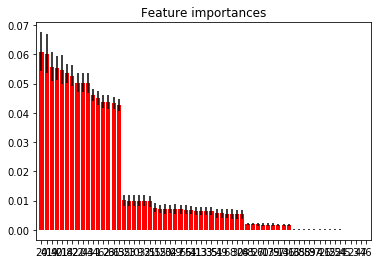

In [11]:
# Training/ Test Split
xx1,xx2,yy1,yy2 =train_test_split(X, y, random_state=0, train_size =0.999, test_size=0.001)

model = ExtraTreesClassifier(n_estimators=500)
model.fit(xx1,yy1)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking 1:")
for f in range(X.shape[1]):
    print("%d. feature %d - '%s' (%f)" % (f + 1, indices[f], df.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# imp = importances(model, xx1, yy1)
# viz = plot_importances(imp, width=12, imp_range=(-0.01, 0.02))
# viz.view()




Feature ranking 2:
1. feature 20 - 'MID_SPLICE_PREV' (0.060867)
2. feature 41 - 'LFT_SPLICE_PREV2' (0.060302)
3. feature 40 - 'BP2_S8_R2' (0.055263)
4. feature 19 - 'LFT_SPLICE_PREV' (0.055801)
5. feature 21 - 'RHT_SPLICE_PREV' (0.054823)
6. feature 42 - 'MID_SPLICE_PREV2' (0.052664)
7. feature 18 - 'PART_LENGTH' (0.053515)
8. feature 43 - 'RHT_SPLICE_PREV2' (0.050243)
9. feature 22 - 'SPLICE_GRADE' (0.050356)
10. feature 0 - 'CUT_LENGTH' (0.050344)
11. feature 44 - 'CUT_LENGTH3' (0.046069)
12. feature 1 - 'CONV_WAIT_TIME' (0.045089)
13. feature 61 - 'BP2_S8_R3' (0.043354)
14. feature 62 - 'LFT_SPLICE_PREV3' (0.043847)
15. feature 63 - 'MID_SPLICE_PREV3' (0.042749)
16. feature 23 - 'CUT_LENGTH2' (0.043810)
17. feature 52 - 'BP2_S2_L3' (0.010071)
18. feature 31 - 'BP2_S2_L2' (0.009749)
19. feature 9 - 'BP2_S1_ML' (0.009963)
20. feature 53 - 'BP2_S1_ML3' (0.010012)
21. feature 32 - 'BP2_S1_ML2' (0.009902)
22. feature 10 - 'BP2_S1_MR' (0.010008)
23. feature 29 - 'BP2_S4_L2' (0.007066)
24.

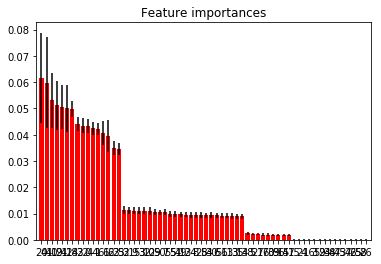

In [12]:
# Training/ Test Split
xx1,xx2,yy1,yy2 =train_test_split(X, y, random_state=0, train_size =0.999, test_size=0.001)

model = RandomForestClassifier(n_estimators=500, warm_start=True)
model.fit(xx1,yy1)
importances2 = model.feature_importances_
std2 = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices2 = np.argsort(importances2)[::-1]

print("Feature ranking 2:")
for f in range(X.shape[1]):
    print("%d. feature %d - '%s' (%f)" % (f + 1, indices2[f], df.columns[indices2[f]], importances[indices2[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances2[indices2], color="r", yerr=std2[indices2], align="center")
plt.xticks(range(X.shape[1]), indices2)
plt.xlim([-1, X.shape[1]])
plt.show()

# imp = importances(model, xx1, yy1)
# viz = plot_importances(imp, width=12, imp_range=(-0.01, 0.02))
# viz.view()


XGBClassifier Accuracy : 0.8307646959743978


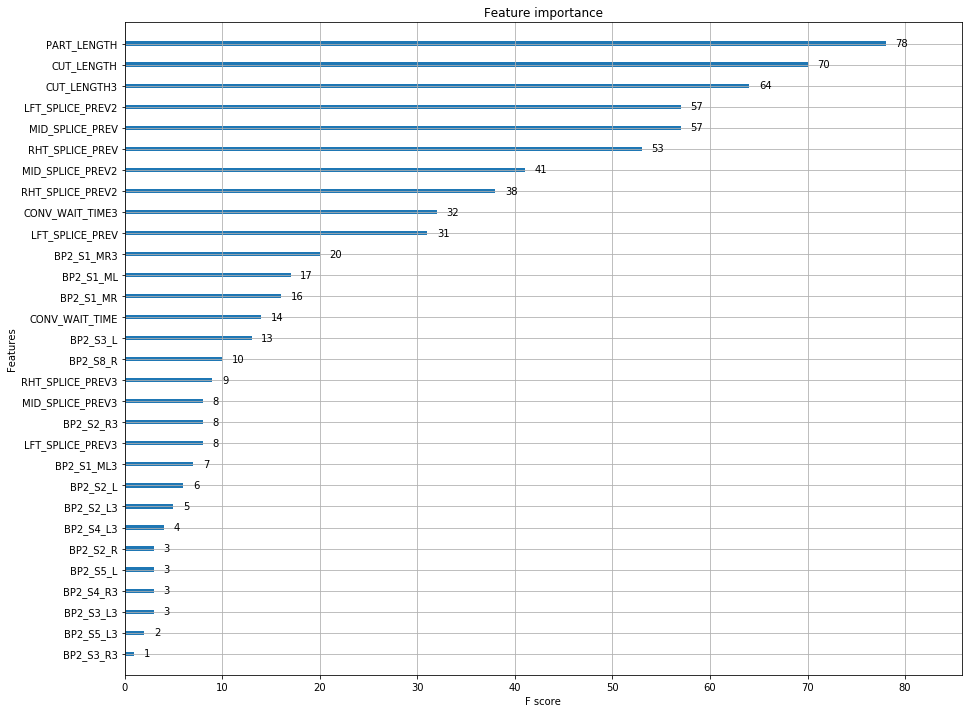

In [13]:
# https://github.com/parrt/random-forest-importances

df_train, df_test = train_test_split(df, test_size=0.20)

X_train, y_train = df_train.drop('SPLICE_GRADE',axis=1), df_train['SPLICE_GRADE']
X_test, y_test = df_test.drop('SPLICE_GRADE',axis=1), df_test['SPLICE_GRADE']

model = XGBClassifier(max_depth=4, n_estimators=500)
model.fit(X_train, y_train)

y2_XGB_model = model.predict(X_test)
print("XGBClassifier Accuracy :", accuracy_score(y_test, y2_XGB_model))

# plot feature importance
ax = plot_importance(model) # , ax=ax)
fig = ax.figure
fig.set_size_inches(15,12)
plt.show()

In [14]:
# todo - add all the classifiers and test


fold = 1
# kf = KFold(n_splits=5, random_state=None, shuffle=True)
kf = StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
for train_index, test_index in kf.split(X,y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x1, x2 = X.iloc[train_index], X.iloc[test_index]
    y1, y2 = y.iloc[train_index], y.iloc[test_index]
    
    print(" ********** FOLD - ", fold, " ********** ")
#     # Train our classifier and test predict
#     BNB.fit(x1,y1)
#     y2_BNB_model = BNB.predict(x2)
#     print("BernoulliNB Accuracy :", accuracy_score(y2, y2_BNB_model))

#     GNB.fit(x1, y1)
#     y2_GNB_model = GNB.predict(x2)
#     print("GaussianNB Accuracy :", accuracy_score(y2, y2_GNB_model))

#     KNN.fit(x1,y1)
#     y2_KNN_model = KNN.predict(x2)
#     print("KNeighborsClassifier Accuracy :", accuracy_score(y2, y2_KNN_model))

#     LR.fit(x1,y1)
#     y2_LR_model = LR.predict(x2)
#     print("LogisticRegression Accuracy :", accuracy_score(y2, y2_LR_model))

#     LSVC.fit(x1,y1)
#     y2_LSVC_model = LSVC.predict(x2)
#     print("LinearSVC Accuracy :", accuracy_score(y2, y2_LSVC_model))

    mlp1.fit(x1,y1)
    y2_MLP1_model = mlp1.predict(x2)
    print("MLPClassifier 1 Accuracy :", accuracy_score(y2, y2_MLP1_model))
    
#     MNB.fit(x1,y1)
#     y2_MNB_model = MNB.predict(x2)
#     print("MultinomialNB Accuracy :", accuracy_score(y2, y2_MNB_model))
    
# #     NSVC.fit(x1,y1)
# #     y2_NSVC_model = NSVC.predict(x2)
# #     print("NuSVC Accuracy :", accuracy_score(y2, y2_NSVC_model))
    
#     SGD.fit(x1,y1)
#     y2_SGD_model = SGD.predict(x2)
#     print("SGDClassifier Accuracy :", accuracy_score(y2, y2_SGD_model))
    
#     SVC.fit(x1,y1)
#     y2_SVC_model = SVC.predict(x2)
#     print("SVC Accuracy :", accuracy_score(y2, y2_SVC_model))
    
#     ADA.fit(x1,y1)
#     y2_ADA_model = ADA.predict(x2)
#     print("AdaBoostClassifier Accuracy :", accuracy_score(y2, y2_ADA_model))
    
#     bag.fit(x1,y1)
#     y2_BAG_model = bag.predict(x2)
#     print("BaggingClassifier Accuracy :", accuracy_score(y2, y2_BAG_model))

#     etc2.fit(x1,y1)
#     y2_ETC2_model = etc2.predict(x2)
#     print("ExtraTreesClassifier Accuracy :", accuracy_score(y2, y2_ETC2_model))
#     importances = XTree.feature_importances_
#     std = np.std([tree.feature_importances_ for tree in XTree.estimators_], axis=0)
#     indices = np.argsort(importances)[::-1]

#     GBC.fit(x1,y1)
#     y2_GBC_model = GBC.predict(x2)
#     print("GradientBoostingClassifier Accuracy :", accuracy_score(y2, y2_GBC_model))

    rfc.fit(x1,y1)
    y2_RFC_model = rfc.predict(x2)
    print("RandomForestClassifier Accuracy :", accuracy_score(y2, y2_RFC_model))
#     importances2 = RFC.feature_importances_
#     std2 = np.std([tree.feature_importances_ for tree in RFC.estimators_], axis=0)
#     indices2 = np.argsort(importances2)[::-1]
    
    xgb.fit(x1,y1)
    y2_XGB_model = xgb.predict(x2)
    print("XGBClassifier Accuracy :", accuracy_score(y2, y2_XGB_model))
    fold += 1

# print("Feature ranking 1:")
# for f in range(X.shape[1]):
#     print("%d. feature %d - '%s' (%f)" % (f + 1, indices[f], df.columns[indices[f]], importances[indices[f]]))

# # Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
# plt.show()

# print("Feature ranking 2:")
# for f in range(X.shape[1]):
#     print("%d. feature %d - '%s' (%f)" % (f + 1, indices2[f], df.columns[indices2[f]], importances[indices2[f]]))

# # Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X.shape[1]), importances2[indices2], color="r", yerr=std2[indices2], align="center")
# plt.xticks(range(X.shape[1]), indices2)
# plt.xlim([-1, X.shape[1]])
# plt.show()

 ********** FOLD -  1  ********** 
MLPClassifier 1 Accuracy : 0.8225684210526316
RandomForestClassifier Accuracy : 0.8350315789473685
XGBClassifier Accuracy : 0.8362105263157895
 ********** FOLD -  2  ********** 
MLPClassifier 1 Accuracy : 0.8225684210526316


C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


RandomForestClassifier Accuracy : 1.0
XGBClassifier Accuracy : 0.8305684210526316
 ********** FOLD -  3  ********** 
MLPClassifier 1 Accuracy : 0.8225684210526316


C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


RandomForestClassifier Accuracy : 1.0
XGBClassifier Accuracy : 0.832
 ********** FOLD -  4  ********** 
MLPClassifier 1 Accuracy : 0.8225684210526316


C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


RandomForestClassifier Accuracy : 1.0
XGBClassifier Accuracy : 0.8342736842105263
 ********** FOLD -  5  ********** 
MLPClassifier 1 Accuracy : 0.8226376958059626


C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


RandomForestClassifier Accuracy : 1.0
XGBClassifier Accuracy : 0.83240693953175
 ********** FOLD -  6  ********** 
MLPClassifier 1 Accuracy : 0.8226227575170555


C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


RandomForestClassifier Accuracy : 1.0
XGBClassifier Accuracy : 0.8326454981891687
 ********** FOLD -  7  ********** 
MLPClassifier 1 Accuracy : 0.8226227575170555


C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


RandomForestClassifier Accuracy : 1.0
XGBClassifier Accuracy : 0.8333192958814116
 ********** FOLD -  8  ********** 
MLPClassifier 1 Accuracy : 0.8226227575170555


C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


RandomForestClassifier Accuracy : 1.0
XGBClassifier Accuracy : 0.829950307420197
 ********** FOLD -  9  ********** 
MLPClassifier 1 Accuracy : 0.8226227575170555


C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


RandomForestClassifier Accuracy : 1.0
XGBClassifier Accuracy : 0.8339930935736545
 ********** FOLD -  10  ********** 
MLPClassifier 1 Accuracy : 0.8226227575170555


C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


RandomForestClassifier Accuracy : 1.0
XGBClassifier Accuracy : 0.832477048766108


In [15]:
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# https://explained.ai/rf-importance/

# # use feature importance for feature selection
# from numpy import loadtxt
# from numpy import sort
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.feature_selection import SelectFromModel
# # load data
# dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# # split data into X and y
# X = dataset[:,0:8]
# Y = dataset[:,8]
# # split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# # fit model on all training data
# model = XGBClassifier()
# model.fit(X_train, y_train)
# # make predictions for test data and evaluate
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
# # Fit model using each importance as a threshold
# thresholds = sort(model.feature_importances_)
# for thresh in thresholds:
# 	# select features using threshold
# 	selection = SelectFromModel(model, threshold=thresh, prefit=True)
# 	select_X_train = selection.transform(X_train)
# 	# train model
# 	selection_model = XGBClassifier()
# 	selection_model.fit(select_X_train, y_train)
# 	# eval model
# 	select_X_test = selection.transform(X_test)
# 	y_pred = selection_model.predict(select_X_test)
# 	predictions = [round(value) for value in y_pred]
# 	accuracy = accuracy_score(y_test, predictions)
# 	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

In [16]:
# target_names = ['Bad', 'OK', 'Good']
target_names = ['Bad', 'Good']
class_names = target_names

In [17]:
# print(" *********** GaussianNB *********** ")
# print(classification_report(y2, y2_GNB_model, target_names=target_names, sample_weight=None, digits=4))

# print(" *********** KNeighborsClassifier *********** ")
# print(classification_report(y2, y2_KNN_model, target_names=target_names, sample_weight=None, digits=4))

# print(" *********** LogisticRegression *********** ")
# print(classification_report(y2, y2_LR_model, target_names=target_names, sample_weight=None, digits=4))

# print(" *********** SVC *********** ")
# print(classification_report(y2, y2_SVC_model, target_names=target_names, sample_weight=None, digits=4))

# print(" *********** AdaBoostClassifier *********** ")
# print(classification_report(y2, y2_ADA_model, target_names=target_names, sample_weight=None, digits=4))

# print(" *********** BaggingClassifier *********** ")
# print(classification_report(y2, y2_BAG_model, target_names=target_names, sample_weight=None, digits=4))

# print(" *********** ExtraTreesClassifier *********** ")
# print(classification_report(y2, y2_XTree_model, target_names=target_names, sample_weight=None, digits=4))

# print(" *********** GradientBoostingClassifier *********** ")
# print(classification_report(y2, y2_GBC_model, target_names=target_names, sample_weight=None, digits=4))

print(" *********** RandomForestClassifier *********** ")
print(classification_report(y2, y2_RFC_model, target_names=target_names, sample_weight=None, digits=4))


 *********** RandomForestClassifier *********** 
              precision    recall  f1-score   support

         Bad     1.0000    1.0000    1.0000      2106
        Good     1.0000    1.0000    1.0000      9767

   micro avg     1.0000    1.0000    1.0000     11873
   macro avg     1.0000    1.0000    1.0000     11873
weighted avg     1.0000    1.0000    1.0000     11873



In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in it.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
# # Compute confusion matrix
# cnf_matrix = confusion_matrix(y2, y2_GNB_model)
# np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='GaussianNB Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                       title='GaussianNB Normalized confusion matrix')

# plt.show();

In [20]:
# # Compute confusion matrix
# cnf_matrix = confusion_matrix(y2, y2_KNN_model)
# np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='KNeighborsClassifier Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                       title='KNeighborsClassifier Normalized confusion matrix')

# plt.show();

In [21]:
# # Compute confusion matrix
# cnf_matrix = confusion_matrix(y2, y2_SVC_model)
# np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='SVC Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                       title='SVC Normalized confusion matrix')

# plt.show();

Confusion matrix, without normalization
[[2106    0]
 [   0 9767]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


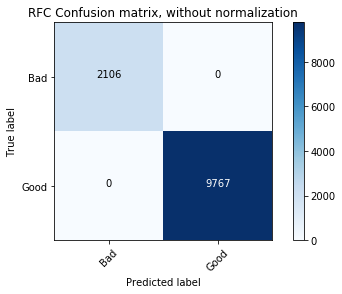

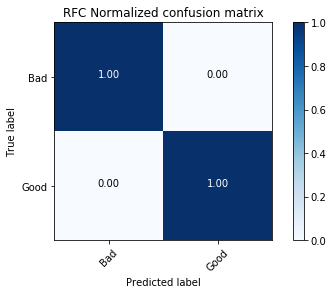

In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y2, y2_RFC_model)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='RFC Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='RFC Normalized confusion matrix')

plt.show();

In [23]:
# Try out these
# sklearn.multioutput.MultiOutputClassifier
# sklearn.multiclass.OutputCodeClassifier
# sklearn.multiclass.OneVsOneClassifier
# sklearn.multiclass.OneVsRestClassifier
# sklearn.model_selection.RandomizedSearchCV -- https://stackoverflow.com/questions/52029408/sklearn-mlp-classifier-hyperparameter-optimization-randomizedsearchcv
# sklearn.model_selection.check_cv
# sklearn.model_selection.StratifiedKFold
# sklearn.linear_model.RidgeClassifierCV
# sklearn.linear_model.PassiveAggressiveClassifier
# sklearn.linear_model.LogisticRegressionCV
# sklearn.gaussian_process.GaussianProcessClassifier
# sklearn.tree.DecisionTreeClassifier
# sklearn.tree.ExtraTreeClassifier
# Feature significance
# Narrow to Wide Splice
# Prev Deltas MA & Slope

# https://github.com/jpmml/jpmml-sklearn


In [24]:
from sklearn.externals import joblib
joblib.dump(rfc, 'rfc_bp2_02_great.pkl', compress=9)

['rfc_bp2_02_great.pkl']

In [25]:
# from sklearn.externals import joblib
# model_clone = joblib.load('rfc_bp2_02_great.pkl')

In [26]:
import pickle
filename = 'rfc_bp2_02_great.sav'
pickle.dump(rfc, open(filename, 'wb'))

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [32]:
from sklearn2pmml import sklearn2pmml
from sklearn2pmml import make_pmml_pipeline

pipeline = make_pmml_pipeline(rfc)
sklearn2pmml(pipeline, "rfc_bp2_02_great.pmml", with_repr = True)